In [20]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from global_land_mask import globe
import scipy.stats as stats
import os

In [2]:
# Load datasets
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202102.GLO.RL06M.MSCNv02CRI.nc")
# catalog = pd.read_csv('eq_200204_202102.csv')
# catalog["time"] = catalog["time"].astype("datetime64")
catalog = pd.read_csv(dataset_path + 'ind_and_bg_probs.csv')
catalog["time"] = catalog["time"].astype("datetime64")

In [3]:
def get_mass(eq):
    mass_change = ds.sel(lat=(eq["latitude"]),lon=(eq["longitude"]),time=(eq["time"]), method="nearest")
    mass_change = mass_change["lwe_thickness"]
    return mass_change.data
  
catalog['dmass'] = catalog.apply(lambda row: get_mass(row), axis=1)

In [4]:
# catalog['on_land'] = globe.is_land(catalog.latitude, catalog.longitude)

In [12]:
def plot_hist(all_time_periods, earthquake_only):
    
    fig,ax = plt.subplots(1, 2, figsize=(15,5))
    fig.patch.set_facecolor('white')
    ax = plt.subplot(1,2,1)
    
    # Cumulative histogram
    plt.style.use('fivethirtyeight')
    bins = np.histogram(earthquake_only, 40)[1]
    ax.hist(earthquake_only, bins, density = True, cumulative=True, histtype='step',
            label='Time periods with an earthquake',linewidth=1.5)
    ax.hist(all_time_periods, bins, density = True, cumulative=True,histtype='step',
            label='All time periods',linewidth=1.5)
    ax.set_ylim((-0.1,1.3))
    ax.legend()
    
    # Non-cumulative histogram
    ax = plt.subplot(1,2,2)
    ax.hist(earthquake_only, bins, density = True, cumulative=False, histtype='step',
            label='Time periods with an earthquake',linewidth=1.5)
    ax.hist(all_time_periods, bins, density = True, cumulative=False,histtype='step',
            label='All time periods',linewidth=1.5)
    yl = ax.get_ylim()
    ax.set_ylim((-0.01,1.4*yl[1]))
    ax.set_xlim((-40,60))
    ax.legend()

In [36]:
def calc_stats(a,b):
    '''
    Calculate stats for the distributions a and b
    a: distribution during earthquakes
    b: distribution over all time periods
    '''
    
    result = {} # this creates a dictionary
    
    # result['cvm'] = stats.cramervonmises_2samp(a, b, method='auto')
    result['median_all'] = np.median(b)
    result['median_eq'] = np.median(a)
    result['mean_all'] = np.mean(b)
    result['mean_eq'] = np.mean(a)
    result['mean_all_minus_mean_eq'] = np.mean(b)-np.mean(a)
    result['median_all_minus_median_eq'] = np.median(b)-np.median(a)
    
    return result

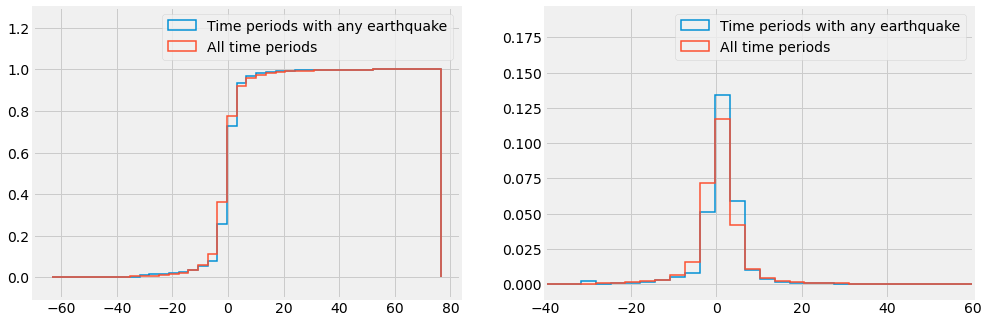

In [13]:
plot_hist(ds['lwe_thickness'].data.flatten(),catalog['dmass'])

In [43]:
calc_stats(np.array(catalog.dmass),np.array(ds['lwe_thickness'].data.flatten()))

{'median_all': 0.6627782418257632,
 'median_eq': 1.425528633547053,
 'mean_all': -0.5782975724802435,
 'mean_eq': 1.1185184026716928,
 'mean_all_minus_mean_eq': -1.6968159751519363,
 'median_all_minus_median_eq': -0.7627503917212898}

## Correlation between reconstructed D values and seismic activity


In [39]:
# Loading D values from pca grace

D_eq_values = []
for filenumber in np.arange(1,7):
    filename = os.path.join('/data/fast1/surface-load/pca/','D_eq_%d.csv'%filenumber)
    D_eq_values.append( np.loadtxt(filename, delimiter=',') )
    # asumes filenames like 'D_eq_values_1.csv', 'D_eq_values_2.csv', and so on

D_values = []
for filenumber in np.arange(1,7):
    filename = os.path.join('/data/fast1/surface-load/pca/','D_%d.csv'%filenumber)
    D_values.append( np.loadtxt(filename, delimiter=',') )

In [42]:
stats = []

for i in range(6):
    stats.append(calc_stats(D_eq_values[i], D_values[i]))

pd.DataFrame(stats)


,median_all,median_eq,mean_all,mean_eq,mean_all_minus_mean_eq,median_all_minus_median_eq
0,0.407497,1.303135,0.250084,1.469378,-1.219294,-0.895637
1,-0.008286,-0.059497,0.000091,-0.039087,0.039178,0.051211
2,-0.000095,0.000209,-0.011434,-0.114358,0.102923,-0.000304
3,-0.006037,0.000756,-0.020014,0.003478,-0.023492,-0.006793
4,0.001291,-0.001878,0.015362,0.011547,0.003815,0.003169
5,-0.000312,-0.019457,0.000298,-0.028654,0.028951,0.019146


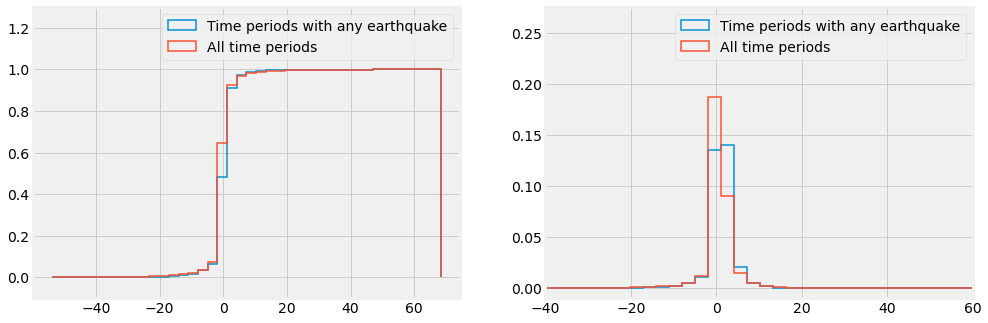

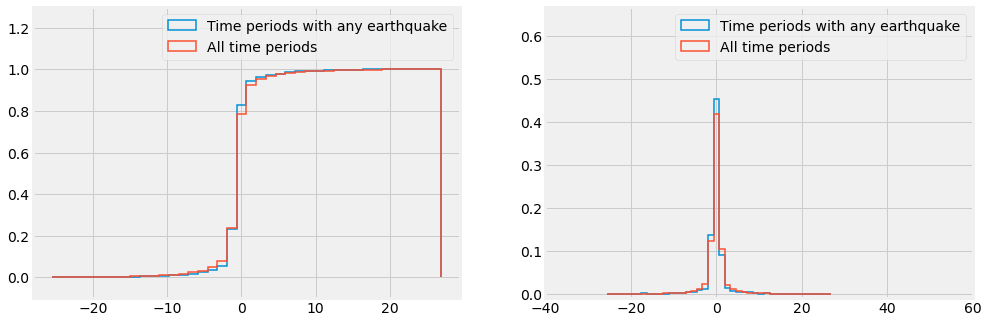

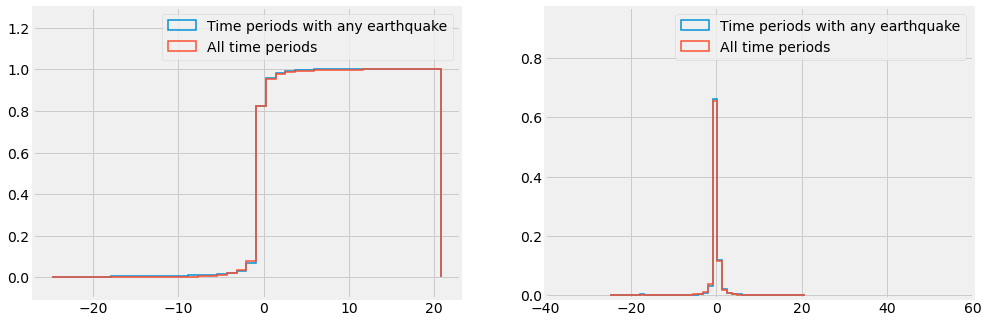

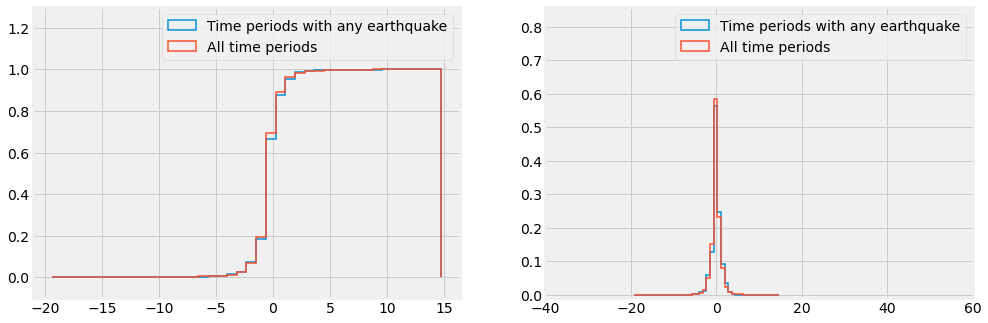

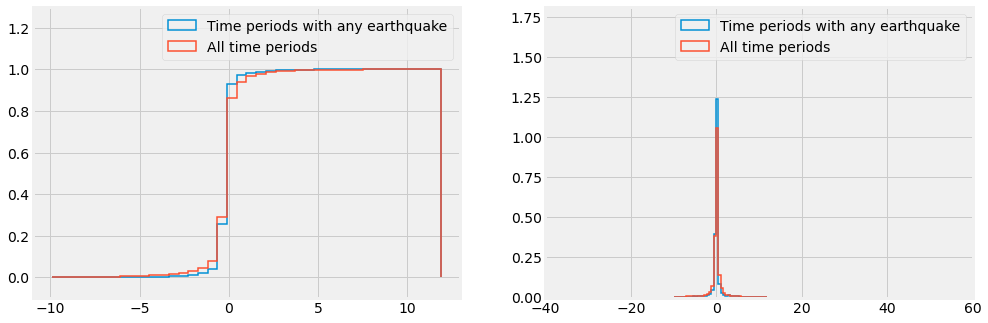

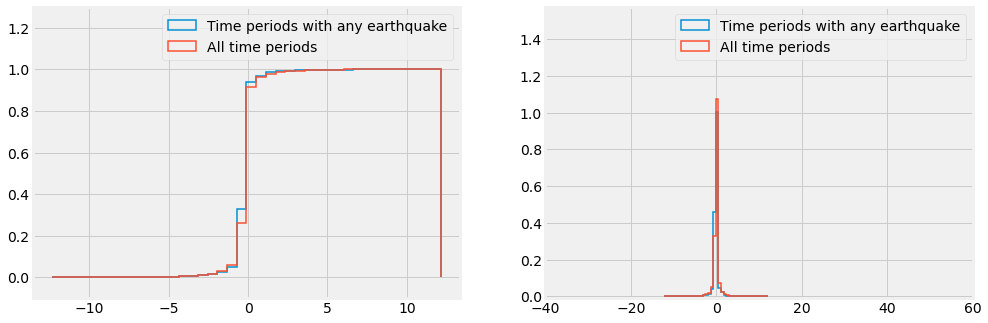

In [41]:
for i in range(6):
    plot_hist(D_values[i].flatten(), D_eq_values[i])

    
# how to make y lim appropriate for all graphs?

,median_all,median_eq,mean_all,mean_eq,mean_all_minus_mean_eq,median_all_minus_median_eq
0,0.407497,1.303135,0.250084,1.469378,-1.219294,-0.895637
1,-0.008286,-0.059497,0.000091,-0.039087,0.039178,0.051211


In [ ]:
# np.median(D.flatten())
# np.median(D_eq_values.flatten())

## Correlation between D values reconstructed from detrended data and seismic activity

In [56]:
# Loading detrended data

D_detrend_eq_values = []
for filenumber in np.arange(1,7):
    D_detrend_eq_values.append( np.loadtxt('D_detrend_eq_%d.csv'%filenumber, delimiter=',') )

D_detrend_values = []
for filenumber in np.arange(1,7):
    D_detrend_values.append( np.loadtxt('D_detrend_%d.csv'%filenumber, delimiter=',') )

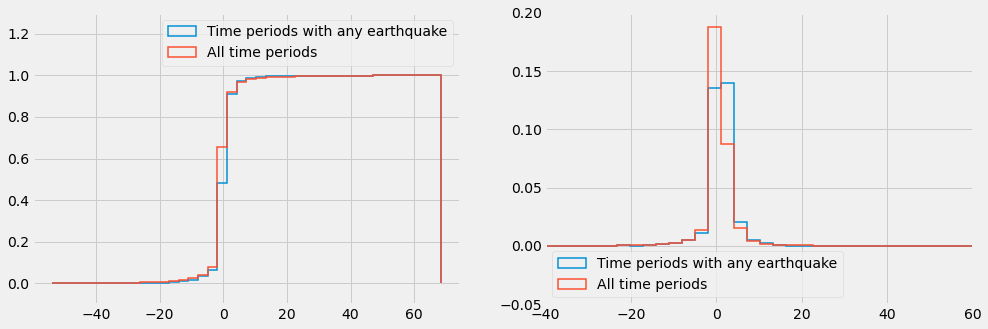

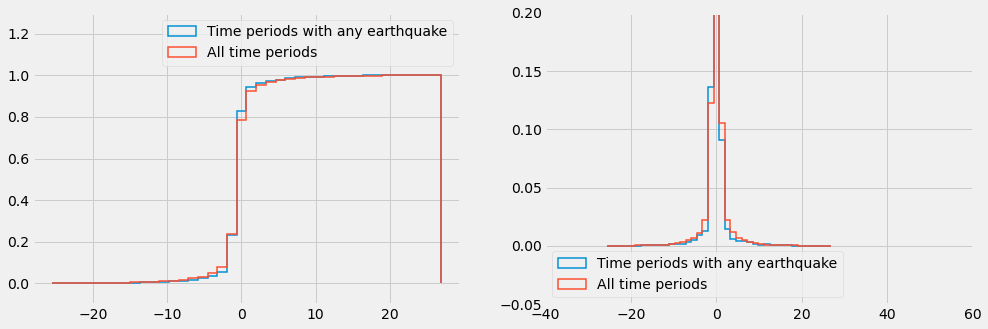

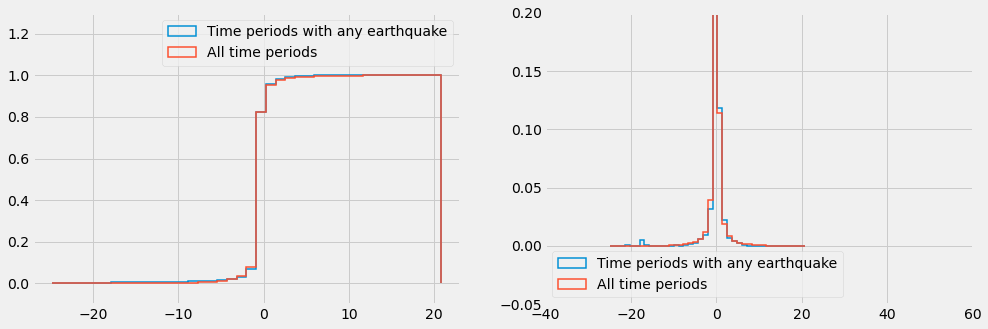

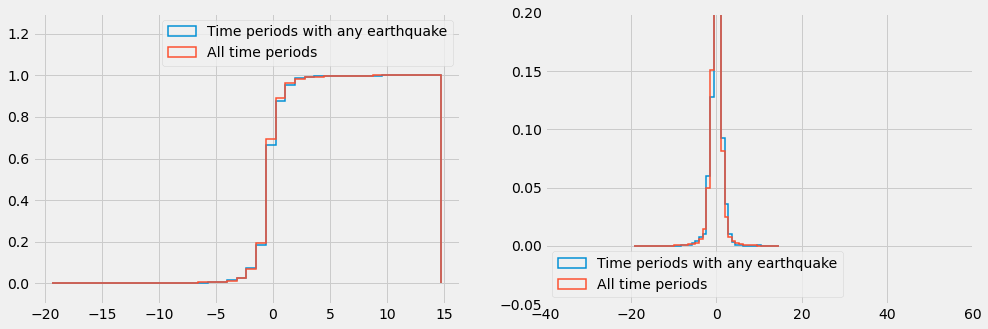

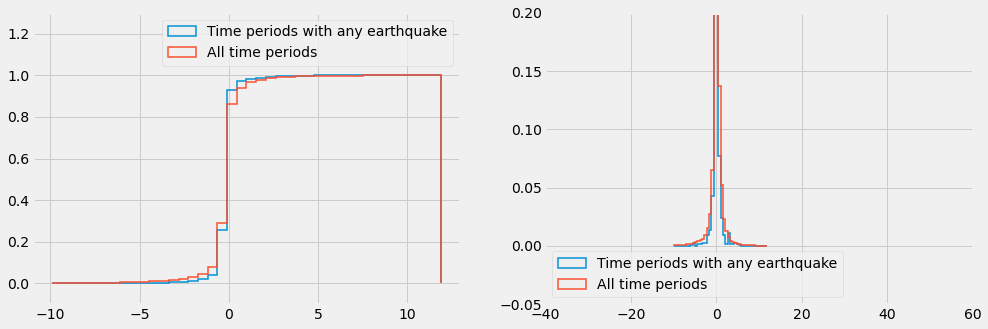

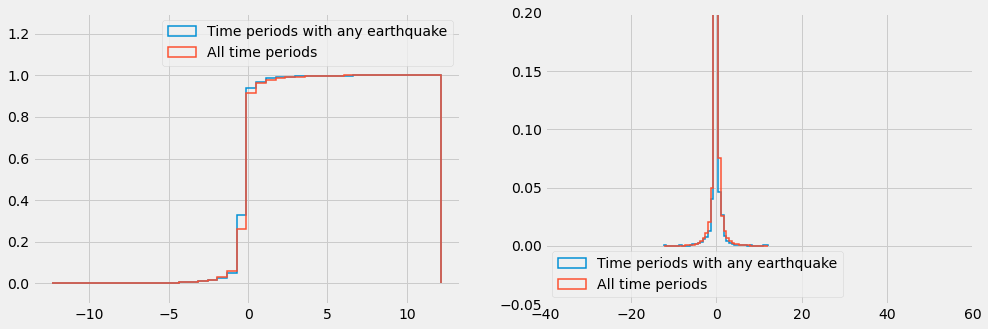

In [58]:
for i in range(6):
    plot_hist(D_detrend_values[i].flatten(), D_detrend_eq_values[i])

In [75]:
stats_detrend = []

for i in range(6):
    stats_detrend.append(calc_stats(D_detrend_eq_values[i], D_detrend_values[i]))

In [78]:
stats_detrend

[{'median_all': 0.3595983278020353, 'median_eq': 1.3031345620154222},
 {'median_all': -0.008286149883062179, 'median_eq': -0.059496689111287665},
 {'median_all': -9.467469722892982e-05, 'median_eq': 0.00020919781520670905},
 {'median_all': -0.006037354075069553, 'median_eq': 0.0007561358482912975},
 {'median_all': 0.0012909011020454234, 'median_eq': -0.0018776853942529508},
 {'median_all': -0.0003115457947751385, 'median_eq': -0.019457419573758752}]

# For next time

1. Plot **maps** of the first six PC's for the detrended and not detrended analyses
2. Based on these maps, decide where we think the line is bewteen significant PC's and noise
3. Remake plots (histograms and maps) showing ony the significant PCs

For the poster, all plots will need axis labels and a larger font and titles

## Maps 

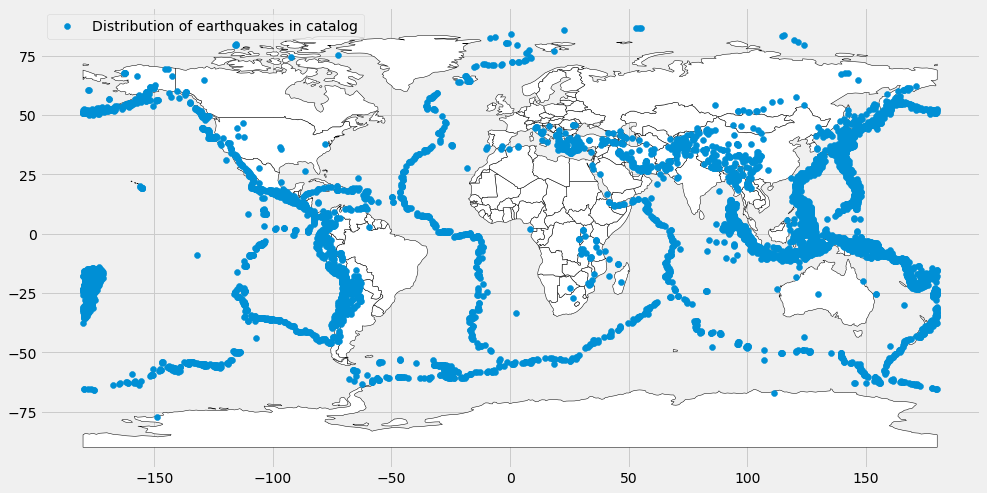

In [79]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(catalog.longitude, catalog.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# ax = world.plot(color='white', edgecolor='black', figsize=(8,6))
ax = world.plot(color='white', edgecolor='black', figsize=(15,10))
gdf.plot(ax=ax, label='Distribution of earthquakes in catalog')
leg = ax.legend()

# gdi = gpd.GeoDataFrame(df_ind, geometry=gpd.points_from_xy(df_ind.longitude, df_ind.latitude))
# gdi.plot(ax=ax, markersize = 5)

# plt.show()

In [86]:
# function to plot maps of earthquake distribution

def plot_map(thr, earthquake_only):
    
    df_bigmass = catalog[np.abs(earthquake_only) > thr]
    gdf = gpd.GeoDataFrame(df_bigmass,
                           geometry=gpd.points_from_xy(df_bigmass.longitude, 
                                                   df_bigmass.latitude))

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(color='white', edgecolor='black', figsize=(15,10))
    gdf.plot(ax=ax, label='All earthquakes that occured at surface load > 25')
    leg = ax.legend()
    plt.show()

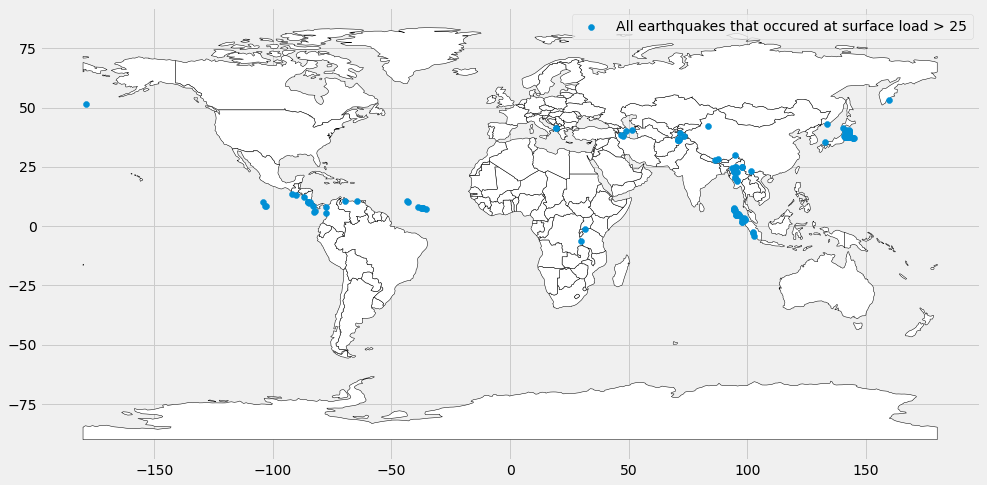

In [89]:
plot_map(25, catalog['dmass'])

### Maps for not detrended analyses

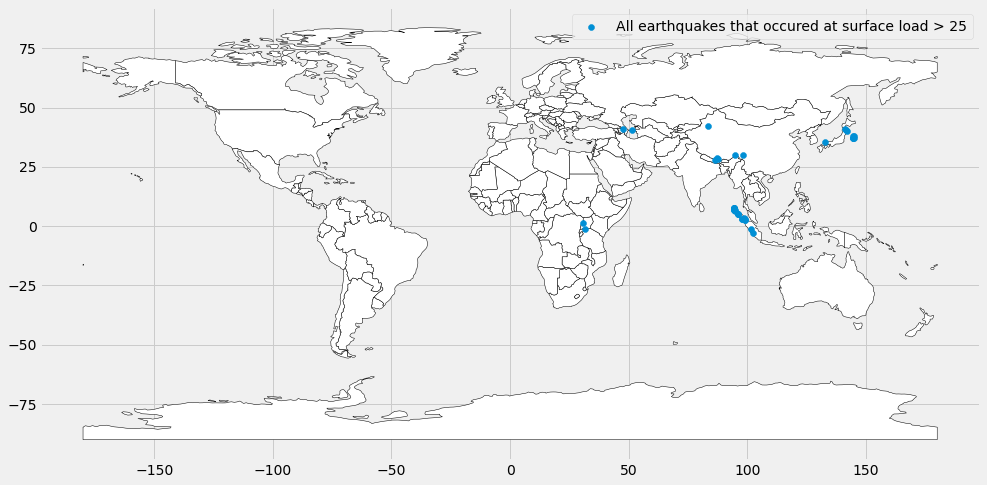

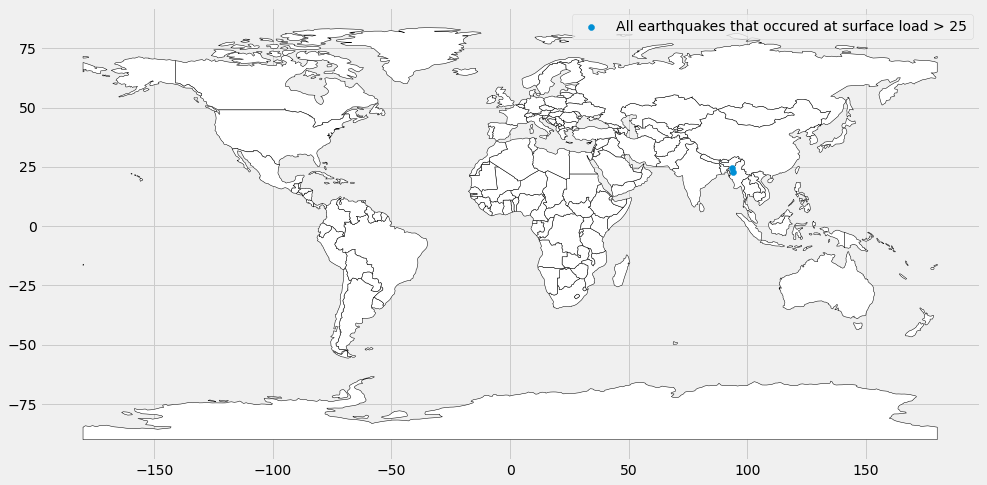

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


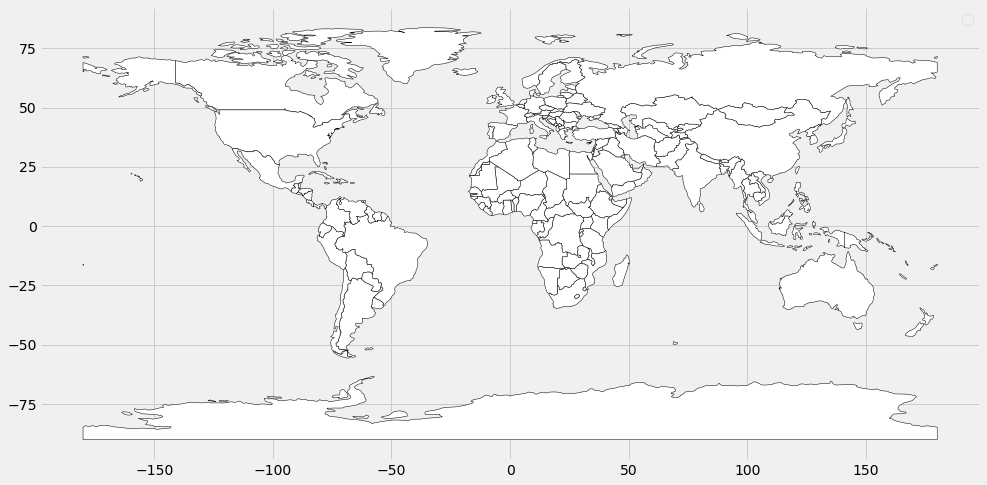

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


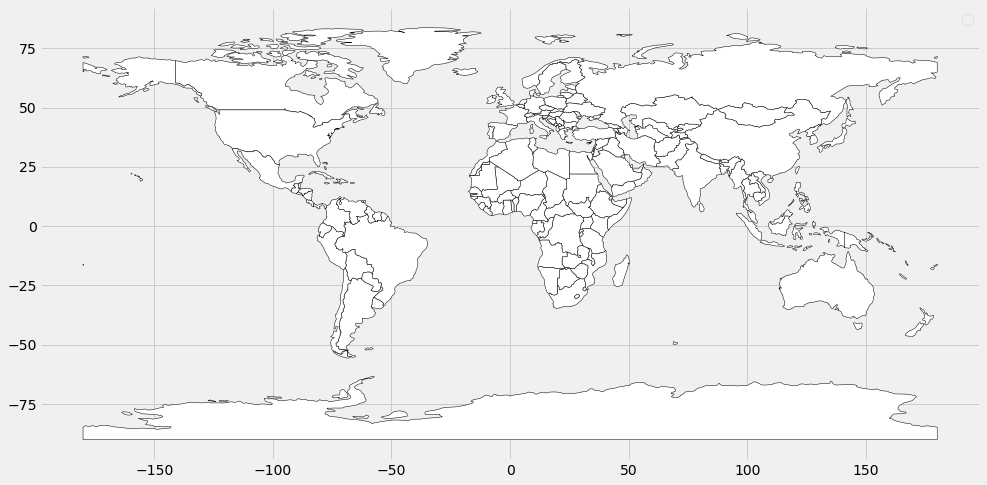

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


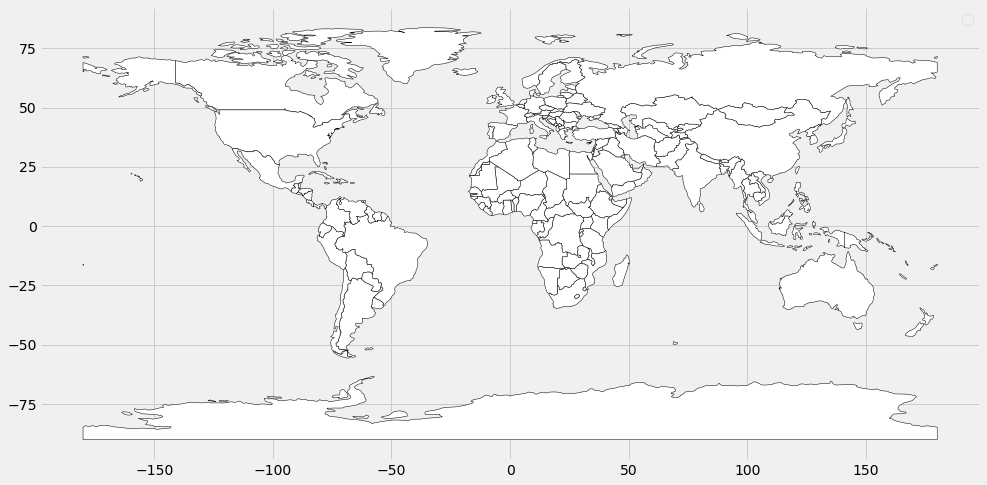

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


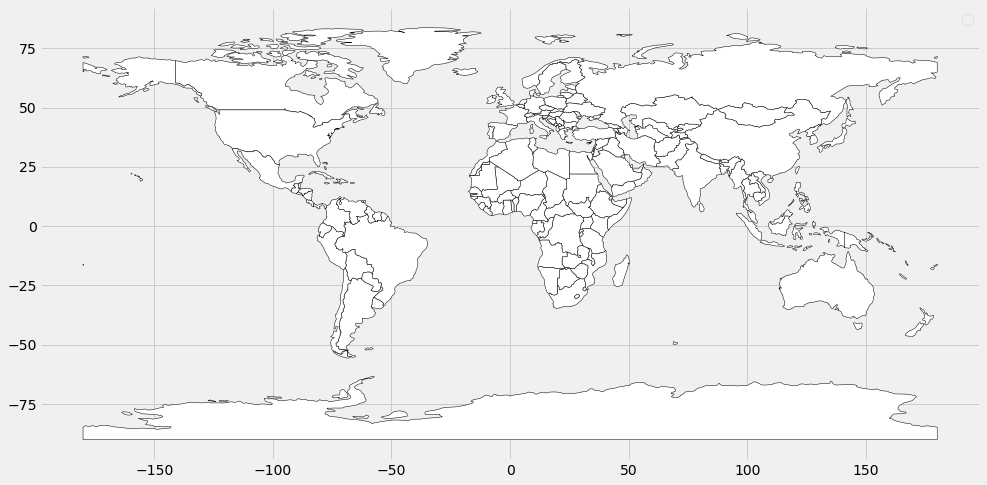

In [95]:
for i in range(6):
    plot_map(25, D_eq_values[i])

### Maps for detrended analyses

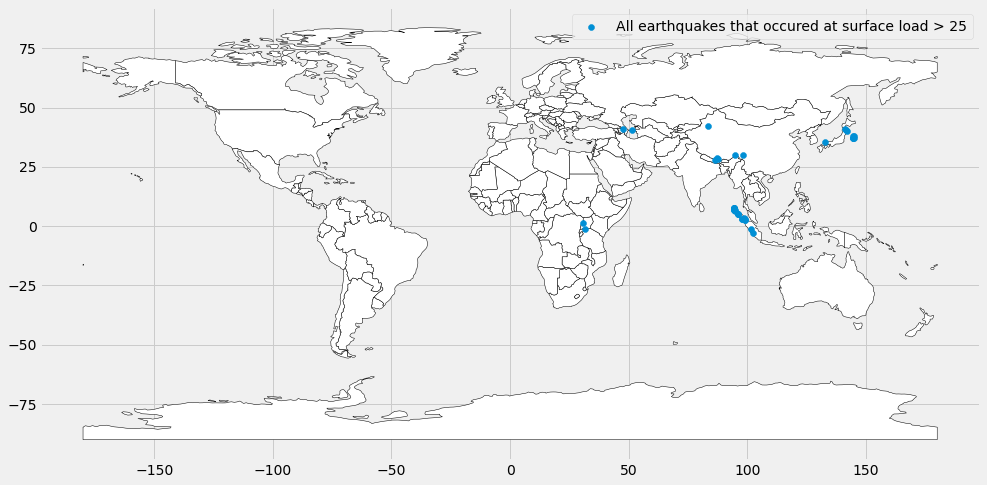

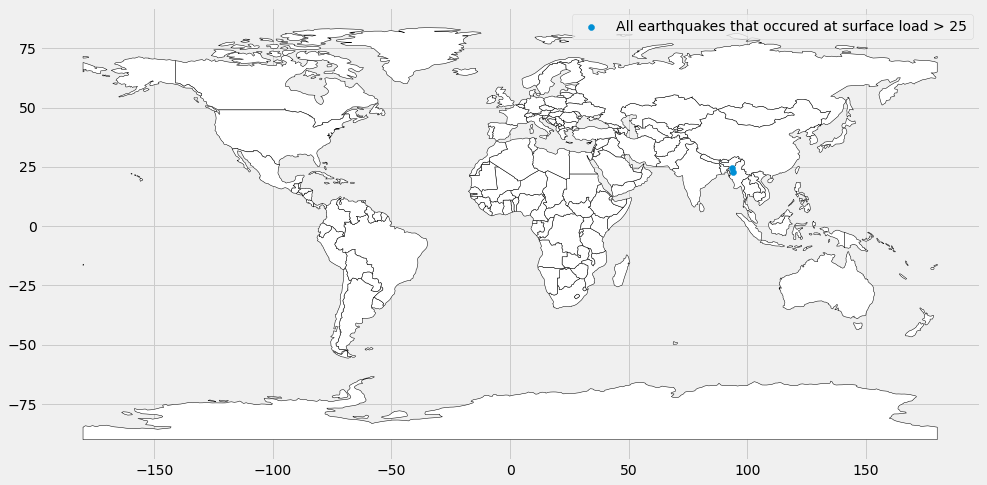

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


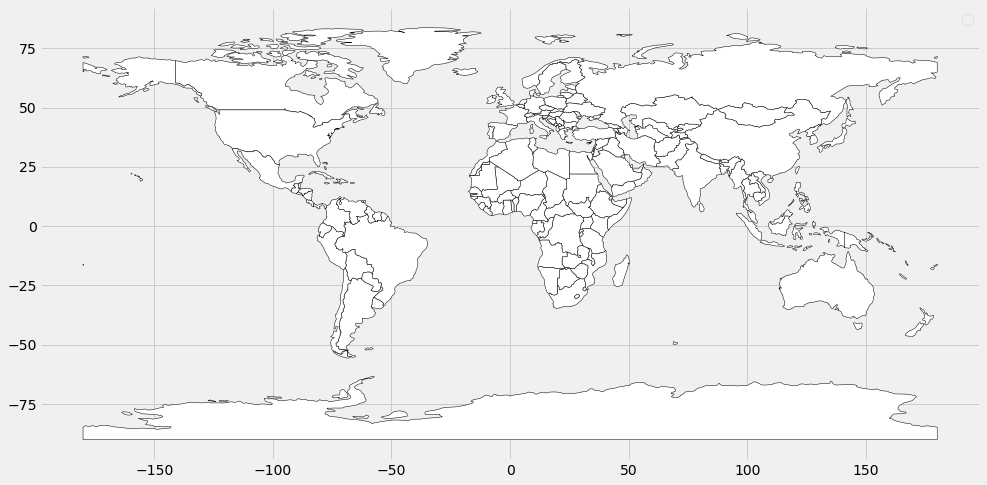

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


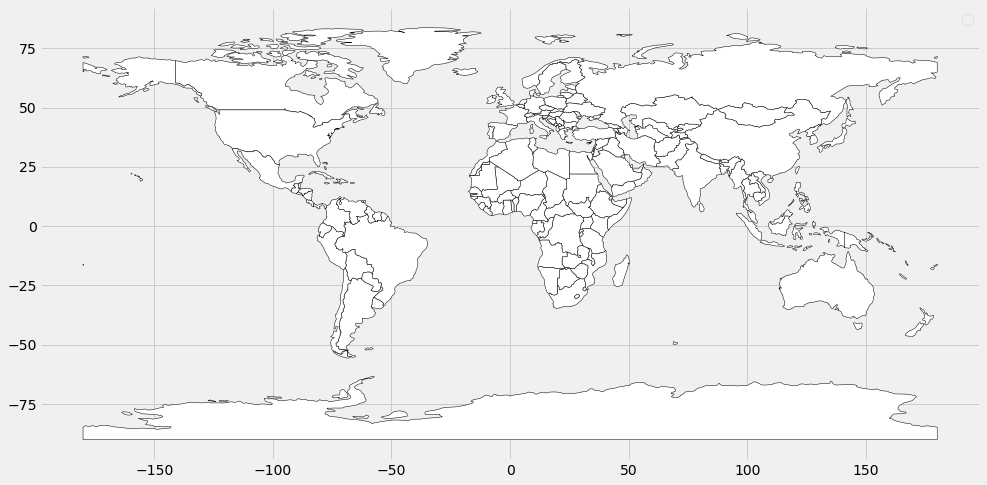

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


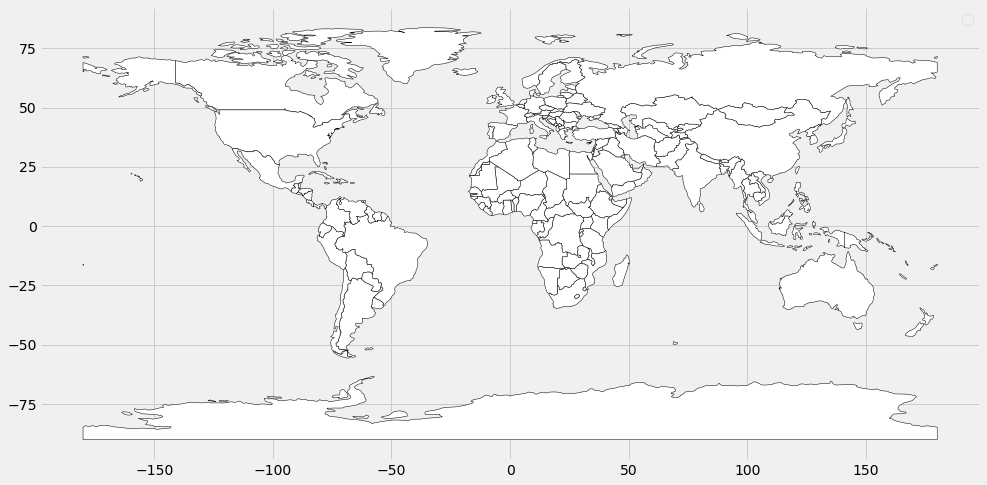

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


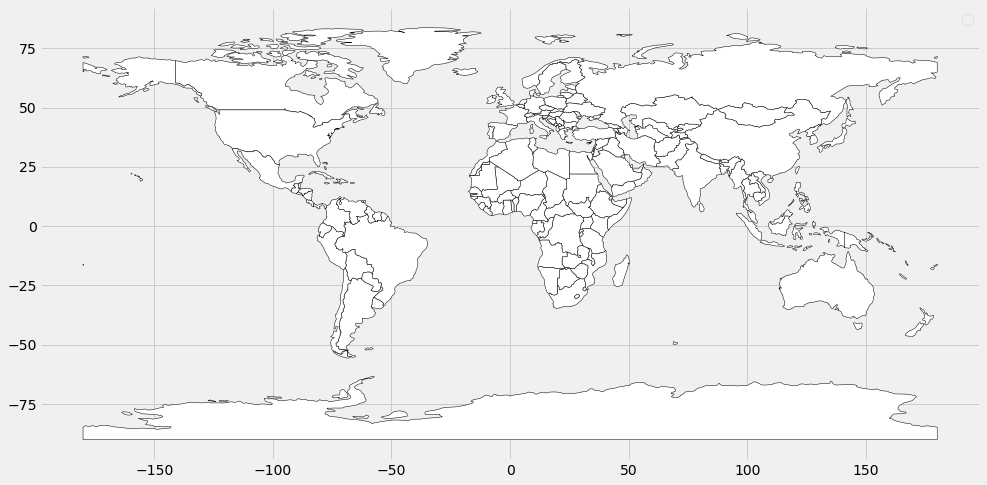

In [94]:
for i in range(6):
    plot_map(25, D_detrend_eq_values[i])